**Analyse de la volatilité des actions choisies sur 1 an**

In [1]:
import yfinance as yf

def get_normalized_volatility(ticker):
    # Récupérer les données de l'action sur 1 an (52 semaines)
    stock = yf.Ticker(ticker)

    # Récupérer les données historiques sur 1 an (252 jours de trading environ)
    hist = stock.history(period="1y")

    # Calculer le prix le plus bas et le plus haut sur les 52 semaines
    high_52week = hist['High'].max()
    low_52week = hist['Low'].min()

    # Calculer l'amplitude du 52-week range
    range_52week = high_52week - low_52week

    # Normaliser cette amplitude par le prix moyen
    avg_price = hist['Close'].mean()
    normalized_volatility = range_52week / avg_price

    return {
        "ticker": ticker,
        #"high_52week": high_52week,
        #"low_52week": low_52week,
        #"range_52week": range_52week,
        #"avg_price": avg_price,
        "normalized_volatility": normalized_volatility
    }

# Le dictionnaire des tickers par secteur
tickers_by_sector = {
    "Santé": [
        "TAK",  # Takeda Pharmaceuticals
        "RHHBY",  # Roche
        "ZTS"  # Zoetis
    ],
    "Agro_Alimentaire": [
        "UL",  # Unilever
        "ADM"  # Archer-Daniels-Midland Company
    ],
    "Défense": [
        "NOC",  # Northrop Grumman
        "LMT",  # Lockheed Martin
        "GD",   # General Dynamics
        "DSY.PA"  # Dassault Systems
    ],
    "Energies_Fossiles": [
        "TTE",  # TotalEnergies
        "BP",  # BP
        "1088.HK"  # China Shenhua Energy
    ],
    "Or": [
        "NEM",  # Newmont Corporation
        "CMCL",  # Caledonia Mining Corporation Plc
        "RGLD"  # Royal Gold, Inc.
    ],
    "Alimentaire": [
        "CL",  # Colgate-Palmolive
        "NSRGY",  # Nestle
        "WMT",  # Walmart
        "COST",  # Costco
        "AWK",  # American Water Works Company, Inc.
        "LISN.SW",  # Lindt
        "BARN.SW"  # Barry Callebaut AG
    ],
    "Tech": [
        "AMD",  # AMD
        "INTC",  # Intel
        "NFLX",  # Netflix
        "PYPL",  # PayPal
        "AVGO"  # Broadcom
    ],
    "Immobilier": [
        "NEX.PA"  # Nexity
    ],
    "Inde": [
        "M&M.BO",  # Mahindra & Mahindra Ltd
        "SUNPHARMA.BO",  # Sun Pharmaceuticals Industries Ltd
        "COALINDIA.BO",  # Coal India Ltd
        "VBL.BO",  # Varun Beverages Ltd
        "HAL.BO",  # Hindustan Aeronautics Ltd
        "ADANIENT.BO"  # Adani Enterprises Ltd
    ],
    "Arabie_Saoudite": [
        "1180.SR",  # The Saudi National Bank
        "1060.SR"  # Saudi Awwal Bank
    ],
    "Semi_Conducteurs": [
        "TSM",  # Taiwan Semiconductor Manufacturing Company (TSMC)
        "ASML"  # ASML Holding
    ],
    "Non_Risqué_Français": [
        "VIV.PA",  # Vivendi
        "VEOEY",  # Veolia
        "BN.PA",  # Danone
        "GET.PA",  # Groupe Eurotunnel
        "MC.PA"  # LVMH
    ]
}

# Liste pour stocker les résultats
all_results = []

# Boucle sur chaque secteur et chaque ticker pour récupérer la volatilité normalisée
for sector, tickers in tickers_by_sector.items():
    print(f"Analyzing sector: {sector}")
    for ticker in tickers:
        try:
            result = get_normalized_volatility(ticker)
            #result['sector'] = sector  # Ajouter le secteur pour plus de clarté
            all_results.append(result)
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")

# Trier les résultats par 'normalized_volatility' dans l'ordre décroissant
sorted_results = sorted(all_results, key=lambda x: x['normalized_volatility'], reverse=True)

# Afficher les résultats triés
for res in sorted_results:
    print(res)

Analyzing sector: Santé
Analyzing sector: Agro_Alimentaire
Analyzing sector: Défense
Analyzing sector: Energies_Fossiles
Analyzing sector: Or
Analyzing sector: Alimentaire
Analyzing sector: Tech
Analyzing sector: Immobilier
Analyzing sector: Inde
Analyzing sector: Arabie_Saoudite
Analyzing sector: Semi_Conducteurs
Analyzing sector: Non_Risqué_Français
{'ticker': 'HAL.BO', 'normalized_volatility': 1.0633259922306988}
{'ticker': 'INTC', 'normalized_volatility': 0.9192620179591111}
{'ticker': 'AMD', 'normalized_volatility': 0.8784696585146928}
{'ticker': 'M&M.BO', 'normalized_volatility': 0.8180432123099756}
{'ticker': 'AVGO', 'normalized_volatility': 0.805644955480452}
{'ticker': 'TSM', 'normalized_volatility': 0.7961365694144521}
{'ticker': 'NEX.PA', 'normalized_volatility': 0.7633794355175394}
{'ticker': 'NEM', 'normalized_volatility': 0.6694235418972292}
{'ticker': 'COALINDIA.BO', 'normalized_volatility': 0.6607442054371583}
{'ticker': 'NFLX', 'normalized_volatility': 0.65910443315795

**Application de notre stratégie CPPI**

In [8]:
# Actions risquées et non risquées
risky_assets = []
non_risky_assets = []

# Déterminer les actions risquées et non risquées
for res in sorted_results:
    if res['normalized_volatility'] > 0.3:
        risky_assets.append(res['ticker'])
    else:
        non_risky_assets.append(res['ticker'])

# Fonction pour calculer l'allocation avec la stratégie CPPI
def cppi_allocation(portfolio_value, floor_value, multiplier):
    cushion = portfolio_value - floor_value
    risky_allocation = min(max(multiplier * cushion, 0), portfolio_value)
    non_risky_allocation = portfolio_value - risky_allocation

    # Calcul des pourcentages
    risky_percentage = (risky_allocation / portfolio_value) * 100
    non_risky_percentage = (non_risky_allocation / portfolio_value) * 100

    return risky_percentage, non_risky_percentage

# Exemple d'utilisation du CPPI
portfolio_value = 700000  # Valeur du portefeuille
protected_rate = 0.2      # Taux de protection (20%)
multiplier = 4            # Multiplicateur CPPI
floor_value = portfolio_value * (1 - protected_rate)

# Calcul de l'allocation
risky_percentage, non_risky_percentage = cppi_allocation(portfolio_value, floor_value, multiplier)

# Résultat final
print(f"Actions risquées : {risky_assets}")
print(f"Actions non risquées : {non_risky_assets}")
print(f"Pourcentage alloué aux actifs risqués : {risky_percentage}%")
print(f"Pourcentage alloué aux actifs non risqués : {non_risky_percentage}%")

Actions risquées : ['HAL.BO', 'INTC', 'AMD', 'M&M.BO', 'TSM', 'AVGO', 'NEX.PA', 'NEM', 'COALINDIA.BO', 'NFLX', 'VBL.BO', 'CMCL', 'ASML', 'SUNPHARMA.BO', '1088.HK', 'ADANIENT.BO', 'COST', 'WMT', 'PYPL', 'CL', 'LMT', 'DSY.PA', 'ADM', 'MC.PA', 'UL', 'RGLD', 'RHHBY', '1180.SR', 'VIV.PA', '1060.SR', 'ZTS', 'GD', 'AWK']
Actions non risquées : ['VEOEY', 'NOC', 'BARN.SW', 'BN.PA', 'BP', 'TAK', 'GET.PA', 'TTE', 'LISN.SW', 'NSRGY']
Pourcentage alloué aux actifs risqués : 80.0%
Pourcentage alloué aux actifs non risqués : 20.0%


**Optimisation de Markowitz pour le groupe d'actions risquées du portefeuille (simulation de Monte carlo pour déterminer les poids du portefeuille optimal)**

                HAL.BO      INTC       AMD    M&M.BO       TSM      AVGO  \
HAL.BO        1.000000  0.157499  0.505194 -0.036038  0.087985  0.156593   
INTC          0.157499  1.000000  0.028451  0.057830 -0.046047  0.106613   
AMD           0.505194  0.028451  1.000000 -0.005884  0.045125  0.105834   
M&M.BO       -0.036038  0.057830 -0.005884  1.000000 -0.041053  0.054739   
TSM           0.087985 -0.046047  0.045125 -0.041053  1.000000  0.046193   
AVGO          0.156593  0.106613  0.105834  0.054739  0.046193  1.000000   
NEX.PA        0.101997  0.194067  0.020935  0.116062  0.111833  0.656223   
NEM           0.024593  0.165128  0.046955  0.070283 -0.006584  0.626601   
COALINDIA.BO  0.091078 -0.117943  0.110574 -0.175193  0.299581 -0.064735   
NFLX          0.025506 -0.061912  0.056099 -0.157681  0.130749 -0.107520   
VBL.BO        0.006173 -0.138774  0.073942  0.017349  0.243177  0.171257   
CMCL          0.096600  0.220923  0.111600  0.581914 -0.003536  0.135143   
ASML        

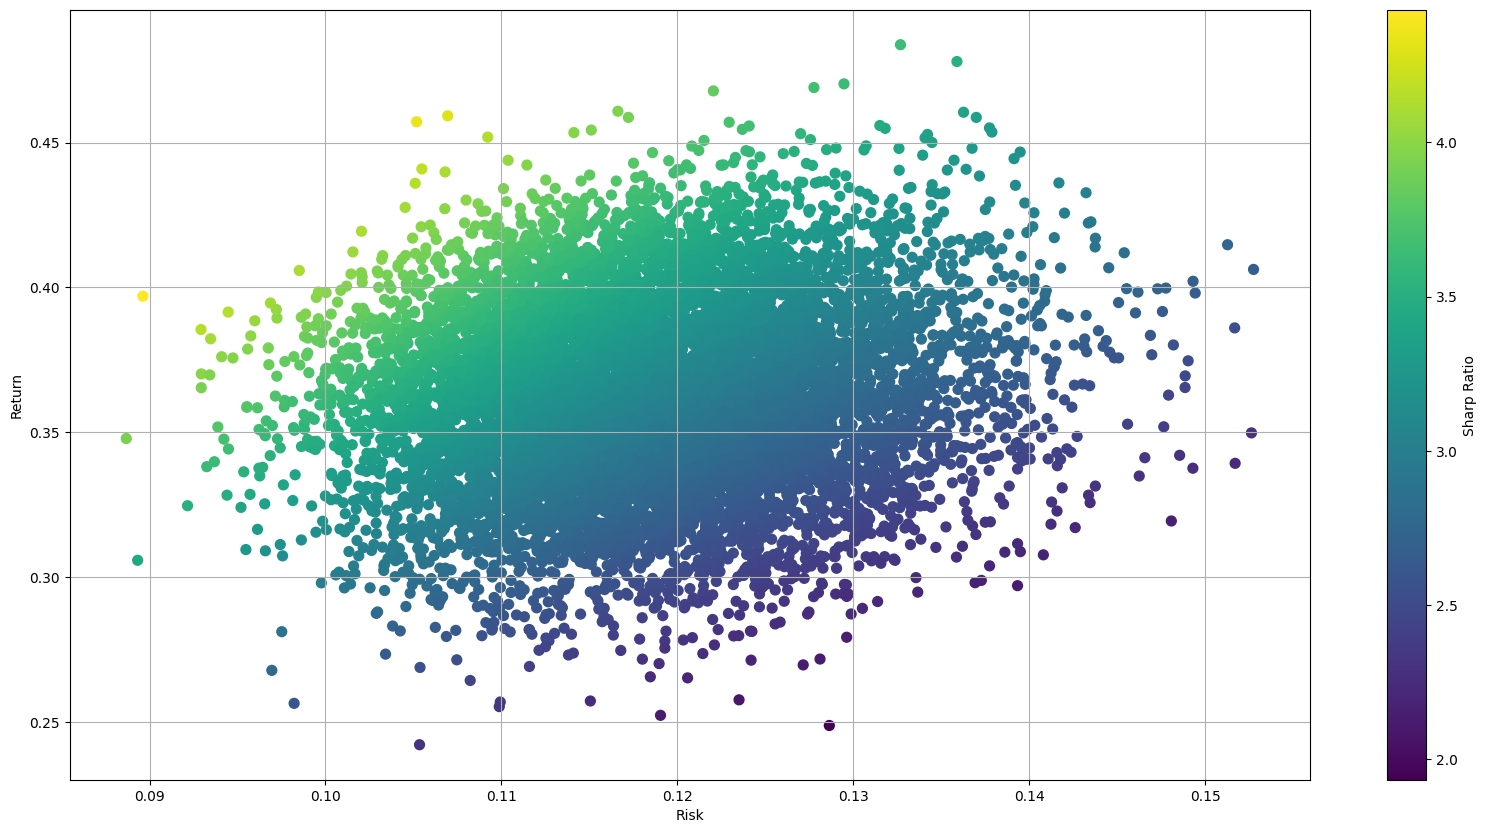

In [8]:
"""
Created on Sun Oct  6 13:50:40 2024

@author: eloi
"""

import numpy as np
import pandas as pd
import yfinance as yf

# Définition de la période de récupération des données
start = "2023-10-08"
end = "2024-10-08"

# Liste des tickers des actions à analyser
tickers = ['HAL.BO', 'INTC', 'AMD', 'M&M.BO', 'TSM', 'AVGO', 'NEX.PA', 'NEM', 'COALINDIA.BO',
           'NFLX', 'VBL.BO', 'CMCL', 'ASML', 'SUNPHARMA.BO', '1088.HK', 'ADANIENT.BO',
           'COST', 'WMT', 'PYPL', 'CL', 'LMT', 'DSY.PA', 'ADM', 'MC.PA', 'UL',
           'RGLD', 'RHHBY', '1180.SR', 'VIV.PA', '1060.SR', 'ZTS', 'GD', 'AWK']

# Téléchargement des données historiques de prix ajustés via Yahoo Finance
prices = yf.download(tickers=tickers, start=start, end=end, progress=False)

# Extraction des prix ajustés de clôture uniquement
prices_adjusted = prices.loc[:, ['Adj Close']]
prices_adjusted.columns = tickers  # Renomme les colonnes avec les tickers




# Calcul des rendements journaliers normalisés
returns = (prices_adjusted - prices_adjusted.shift(1)) / prices_adjusted.shift(1)
returns = returns.iloc[1:]  # Suppression de la première ligne contenant des NaN
portfolio_logReturns = np.log(1 + returns)  # Calcul des rendements logarithmiques

# Affichage de la corrélation des rendements des actifs
correlation = portfolio_logReturns.corr()
print(correlation)

# Moyenne des rendements logarithmiques journaliers (mu) et matrice de covariance (sigma)
mu = portfolio_logReturns.mean()
sigma = portfolio_logReturns.cov()





# Simulation Monte Carlo
n = 10000  # Nombre de portefeuilles à simuler

# Initialisation des matrices pour sauvegarder les résultats
weights_saved = np.zeros((n, len(portfolio_logReturns.columns)))  # Sauvegarde des poids
ret_arr = np.zeros(n)  # Sauvegarde des rendements
risk_arr = np.zeros(n)  # Sauvegarde des risques
sharp_r_arr = np.zeros(n)  # Sauvegarde des ratios de Sharpe

for i in range(n):
    # Génération de poids aléatoires pour chaque portefeuille
    random_w = np.array(np.random.random(len(portfolio_logReturns.columns)))
    random_w_norm = random_w / np.sum(random_w)  # Normalisation des poids (la somme doit être 1)

    weights_saved[i, :] = random_w_norm  # Sauvegarde des poids du portefeuille

    random_w_norm_t = np.transpose(random_w_norm)  # Transposition des poids pour les calculs

    # Calcul du rendement annualisé du portefeuille
    ret_arr[i] = np.sum(mu * random_w_norm) * 252  # 252 jours de trading par an

    # Calcul du risque (écart-type) annualisé du portefeuille
    risk_arr[i] = np.sqrt(np.dot(random_w_norm_t, np.dot(sigma * 252, random_w_norm)))

    # Calcul du ratio de Sharpe pour chaque portefeuille
    sharp_r_arr[i] = ret_arr[i] / risk_arr[i]

# Affichage du Sharpe ratio maximum obtenu
print(f"\n\nSharpe Ratio maximum: {sharp_r_arr.max()}")

# Identification de l'indice du portefeuille ayant le Sharpe ratio maximum
a = sharp_r_arr.argmax()

# Affichage des poids du portefeuille correspondant au Sharpe ratio maximum
print(f"Poids du portefeuille avec le Sharpe Ratio maximum: {weights_saved[a, :]}")

# Affichage du rendement associé au portefeuille optimal
print(f"Rendement du portefeuille optimal: {ret_arr[a]}")




# Affichage du risque (écart-type) associé au portefeuille optimal
print(f"Risque (volatilité) du portefeuille optimal: {risk_arr[a]}")

# Préparation des données pour créer un DataFrame avec les résultats des simulations
result_arr = np.transpose(np.array([ret_arr, risk_arr, sharp_r_arr]))  # Transpose pour obtenir un tableau
column_values = ['Return', 'Risk', 'Sharp Ratio']  # Noms des colonnes

# Création du DataFrame contenant les rendements, risques et Sharpe ratios
result_df = pd.DataFrame(data=result_arr, columns=column_values)




import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(20, 10))

# Affichage du nuage de points (Scatter plot) des risques vs rendements, coloré par le Sharpe ratio
scatter = plt.scatter(result_df['Risk'], result_df['Return'],
                      c=result_df['Sharp Ratio'], cmap='viridis', s=50)

# Ajout d'une barre de couleur pour visualiser le Sharpe ratio
cbar = plt.colorbar(scatter)
cbar.set_label('Sharp Ratio')

# Ajout des labels pour les axes
plt.xlabel('Risk')
plt.ylabel('Return')

# Affichage de la grille et du graphique
plt.grid()
plt.show()

**Même code pour le groupe d'actions non-risquées**

            VEOEY       NOC   BARN.SW     BN.PA        BP       TAK    GET.PA  \
VEOEY    1.000000  0.153128 -0.011397  0.100516  0.337884  0.020495  0.104458   
NOC      0.153128  1.000000  0.013986  0.191652  0.127912  0.143186  0.352963   
BARN.SW -0.011397  0.013986  1.000000  0.038377  0.052308  0.157868  0.106007   
BN.PA    0.100516  0.191652  0.038377  1.000000  0.201162  0.063513  0.219976   
BP       0.337884  0.127912  0.052308  0.201162  1.000000  0.039797  0.166524   
TAK      0.020495  0.143186  0.157868  0.063513  0.039797  1.000000  0.012161   
GET.PA   0.104458  0.352963  0.106007  0.219976  0.166524  0.012161  1.000000   
TTE     -0.007989  0.060550  0.167419  0.105080  0.058178  0.179747  0.188203   
LISN.SW  0.039773  0.074231  0.699540  0.141567  0.072013  0.161691  0.181540   
NSRGY    0.037408  0.239258  0.229328  0.352865  0.174238 -0.007034  0.356842   

              TTE   LISN.SW     NSRGY  
VEOEY   -0.007989  0.039773  0.037408  
NOC      0.060550  0.074231 

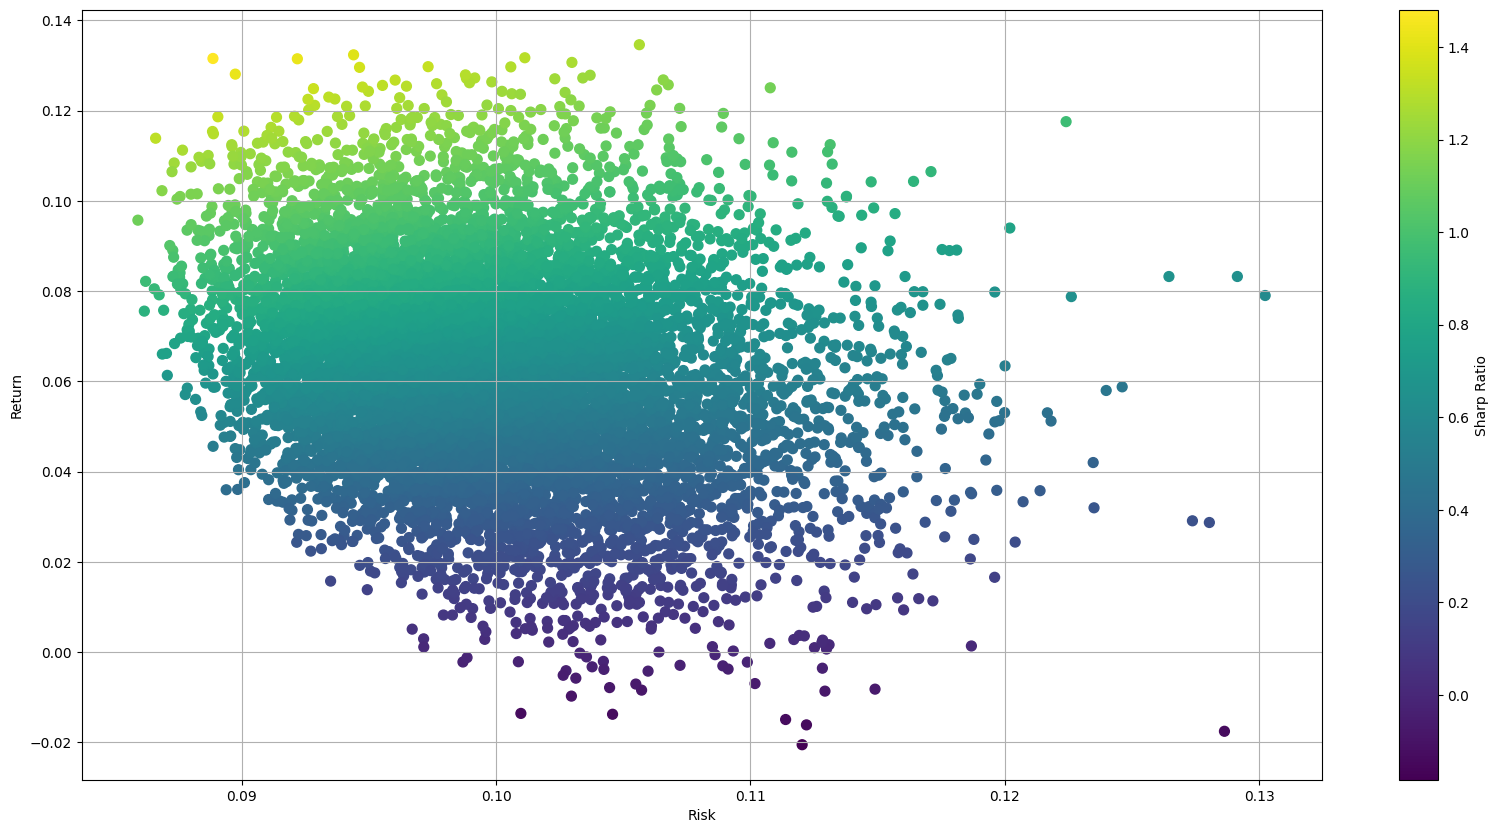

In [7]:
"""
Created on Sun Oct  6 13:50:40 2024

@author: eloi
"""

import numpy as np
import pandas as pd
import yfinance as yf

# Définition de la période de récupération des données
start = "2023-10-08"
end = "2024-10-08"

# Liste des tickers des actions à analyser
tickers = ['VEOEY', 'NOC', 'BARN.SW', 'BN.PA', 'BP', 'TAK', 'GET.PA', 'TTE', 'LISN.SW', 'NSRGY']

# Téléchargement des données historiques de prix ajustés via Yahoo Finance
prices = yf.download(tickers=tickers, start=start, end=end, progress=False)

# Extraction des prix ajustés de clôture uniquement
prices_adjusted = prices.loc[:, ['Adj Close']]
prices_adjusted.columns = tickers  # Renomme les colonnes avec les tickers




# Calcul des rendements journaliers normalisés
returns = (prices_adjusted - prices_adjusted.shift(1)) / prices_adjusted.shift(1)
returns = returns.iloc[1:]  # Suppression de la première ligne contenant des NaN
portfolio_logReturns = np.log(1 + returns)  # Calcul des rendements logarithmiques

# Affichage de la corrélation des rendements des actifs
correlation = portfolio_logReturns.corr()
print(correlation)

# Moyenne des rendements logarithmiques journaliers (mu) et matrice de covariance (sigma)
mu = portfolio_logReturns.mean()
sigma = portfolio_logReturns.cov()





# Simulation Monte Carlo
n = 10000  # Nombre de portefeuilles à simuler

# Initialisation des matrices pour sauvegarder les résultats
weights_saved = np.zeros((n, len(portfolio_logReturns.columns)))  # Sauvegarde des poids
ret_arr = np.zeros(n)  # Sauvegarde des rendements
risk_arr = np.zeros(n)  # Sauvegarde des risques
sharp_r_arr = np.zeros(n)  # Sauvegarde des ratios de Sharpe

for i in range(n):
    # Génération de poids aléatoires pour chaque portefeuille
    random_w = np.array(np.random.random(len(portfolio_logReturns.columns)))
    random_w_norm = random_w / np.sum(random_w)  # Normalisation des poids (la somme doit être 1)

    weights_saved[i, :] = random_w_norm  # Sauvegarde des poids du portefeuille

    random_w_norm_t = np.transpose(random_w_norm)  # Transposition des poids pour les calculs

    # Calcul du rendement annualisé du portefeuille
    ret_arr[i] = np.sum(mu * random_w_norm) * 252  # 252 jours de trading par an

    # Calcul du risque (écart-type) annualisé du portefeuille
    risk_arr[i] = np.sqrt(np.dot(random_w_norm_t, np.dot(sigma * 252, random_w_norm)))

    # Calcul du ratio de Sharpe pour chaque portefeuille
    sharp_r_arr[i] = ret_arr[i] / risk_arr[i]

# Affichage du Sharpe ratio maximum obtenu
print(f"\n\nSharpe Ratio maximum: {sharp_r_arr.max()}")

# Identification de l'indice du portefeuille ayant le Sharpe ratio maximum
a = sharp_r_arr.argmax()

# Affichage des poids du portefeuille correspondant au Sharpe ratio maximum
print(f"Poids du portefeuille avec le Sharpe Ratio maximum: {weights_saved[a, :]}")

# Affichage du rendement associé au portefeuille optimal
print(f"Rendement du portefeuille optimal: {ret_arr[a]}")




# Affichage du risque (écart-type) associé au portefeuille optimal
print(f"Risque (volatilité) du portefeuille optimal: {risk_arr[a]}")

# Préparation des données pour créer un DataFrame avec les résultats des simulations
result_arr = np.transpose(np.array([ret_arr, risk_arr, sharp_r_arr]))  # Transpose pour obtenir un tableau
column_values = ['Return', 'Risk', 'Sharp Ratio']  # Noms des colonnes

# Création du DataFrame contenant les rendements, risques et Sharpe ratios
result_df = pd.DataFrame(data=result_arr, columns=column_values)




import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(20, 10))

# Affichage du nuage de points (Scatter plot) des risques vs rendements, coloré par le Sharpe ratio
scatter = plt.scatter(result_df['Risk'], result_df['Return'],
                      c=result_df['Sharp Ratio'], cmap='viridis', s=50)

# Ajout d'une barre de couleur pour visualiser le Sharpe ratio
cbar = plt.colorbar(scatter)
cbar.set_label('Sharp Ratio')

# Ajout des labels pour les axes
plt.xlabel('Risk')
plt.ylabel('Return')

# Affichage de la grille et du graphique
plt.grid()
plt.show()